# Unsupervised Machine Learning

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Create Path

path=r'C:\Users\Nico\Desktop\Curso Data Analytics\Module 6\World Happiness report'

In [4]:
#Load happy_df_2023 dataset and create a dataframe called 'happy_df_2023'

happy_df_2023 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'happy_df_2023.csv'))

In [5]:
happy_df_2023.columns

Index(['Unnamed: 0', 'country', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'rank'],
      dtype='object')

In [6]:
# Eliminate extra column

happy_df_2023 = happy_df_2023.drop(columns = ['Unnamed: 0'])

In [7]:
#looking for null items

happy_df_2023.isnull().sum()

country                         0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
rank                            0
dtype: int64

In [8]:
#Replacing null items with the mean

happy_df_2023['healthy_life_expectancy'].fillna(happy_df_2023['healthy_life_expectancy'].mean(),inplace=True)

In [9]:
happy_df_2023.isnull().sum()

country                         0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
rank                            0
dtype: int64

In [11]:
# Checking for duplicates

dups = happy_df_2023.duplicated()

In [12]:
dups.shape

(137,)

In [13]:
happy_df_2023.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,rank
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,5.539796,9.449796,0.799073,64.967632,0.787394,0.022431,0.725401,68.978102
std,1.139929,1.207302,0.129222,5.729210,0.112371,0.141707,0.176956,39.698212
min,1.859000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000,1.000000
25%,4.724000,8.591000,0.722000,60.698000,0.724000,-0.074000,0.668000,35.000000
50%,5.684000,9.567000,0.827000,65.825000,0.801000,0.001000,0.774000,69.000000
75%,6.334000,10.540000,0.896000,69.350000,0.874000,0.117000,0.846000,103.000000
max,7.804000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000,137.000000


In [15]:
happy_df_2023.head()

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,rank
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,2
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,3
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,4
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,5


In [18]:
df2 = happy_df_2023.drop(columns = ['country'])

In [19]:
df2.head()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,rank
0,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1
1,7.586,10.962,0.954,71.250,0.934,0.134,0.196,2
2,7.530,10.896,0.983,72.050,0.936,0.211,0.668,3
3,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,4
4,7.403,10.942,0.930,71.550,0.887,0.213,0.379,5


## The elbow technique

In [16]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [20]:
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

C:\Users\Nico\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nico\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Nico\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nico\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

In [21]:
score

[-219178.9100012381,
 -56211.14518893329,
 -25869.401413365507,
 -15590.206229577343,
 -10351.959028942936,
 -7850.6462232299355,
 -6234.059785765043,
 -5086.17938085914,
 -4399.040185240913]

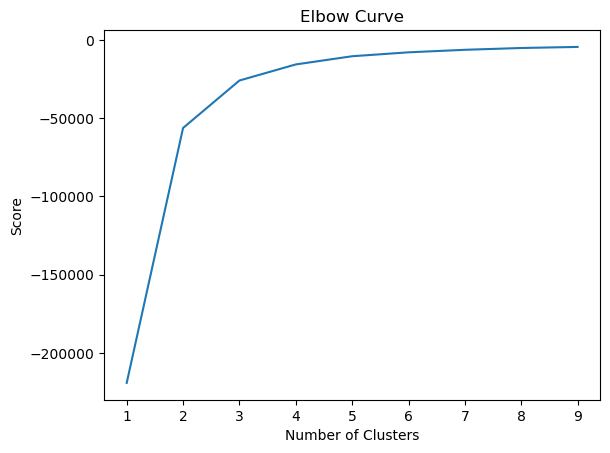

In [22]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [23]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [24]:
# Fit the k-means object to the data.

kmeans.fit(df2)

C:\Users\Nico\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nico\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [27]:
df2['clusters'] = kmeans.fit_predict(df2)

C:\Users\Nico\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nico\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
df2.head()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,rank,clusters
0,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1,0
1,7.586,10.962,0.954,71.250,0.934,0.134,0.196,2,0
2,7.530,10.896,0.983,72.050,0.936,0.211,0.668,3,0
3,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,4,0
4,7.403,10.942,0.930,71.550,0.887,0.213,0.379,5,0


In [30]:
df2['clusters'].value_counts()

1    47
0    45
2    45
Name: clusters, dtype: int64

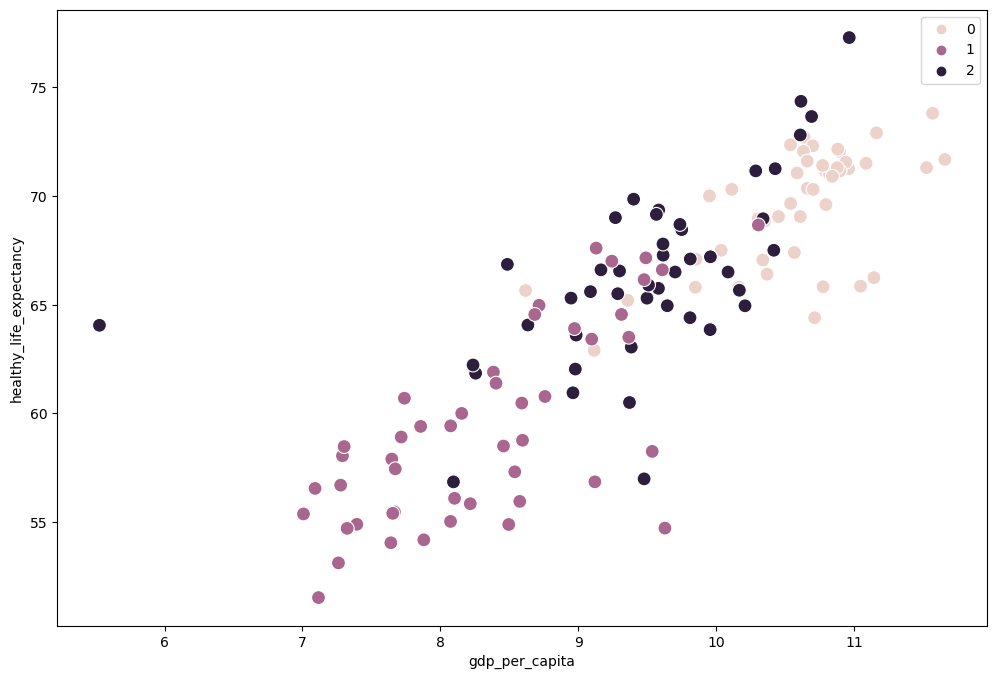

In [31]:
# Plot the clusters for the "gdp_per_capita" and "healthy_life_expectancy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['gdp_per_capita'], y=df2['healthy_life_expectancy'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('gdp_per_capita') # Label x-axis.
plt.ylabel('healthy_life_expectancy') # Label y-axis.
plt.show()

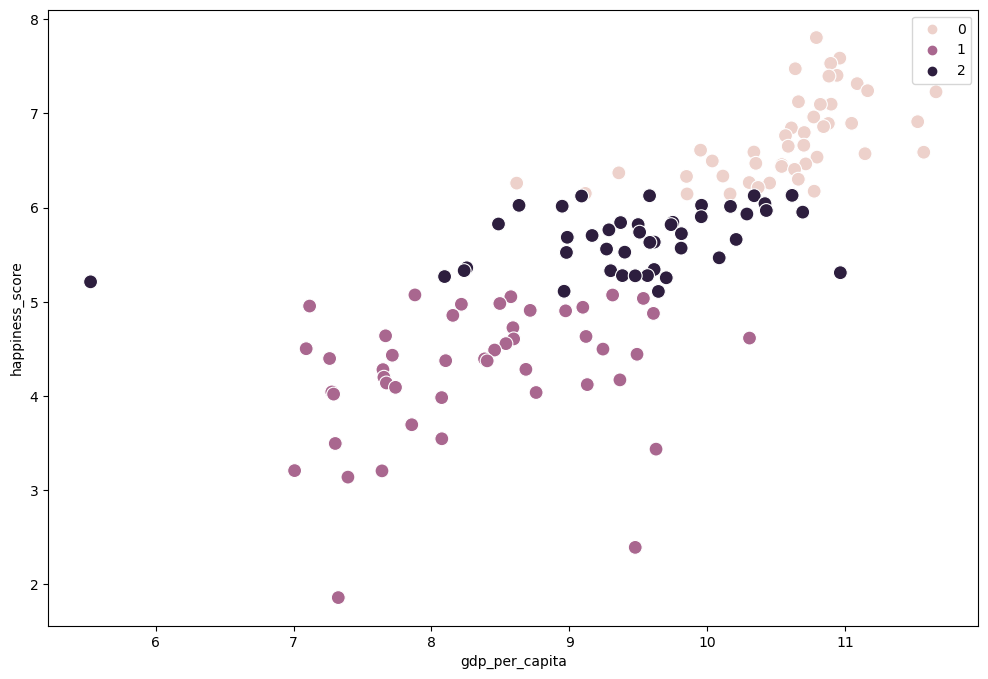

In [32]:
# Plot the clusters for the "gdp_per_capita" and "happiness_score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['gdp_per_capita'], y=df2['happiness_score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('gdp_per_capita') # Label x-axis.
plt.ylabel('happiness_score') # Label y-axis.
plt.show()

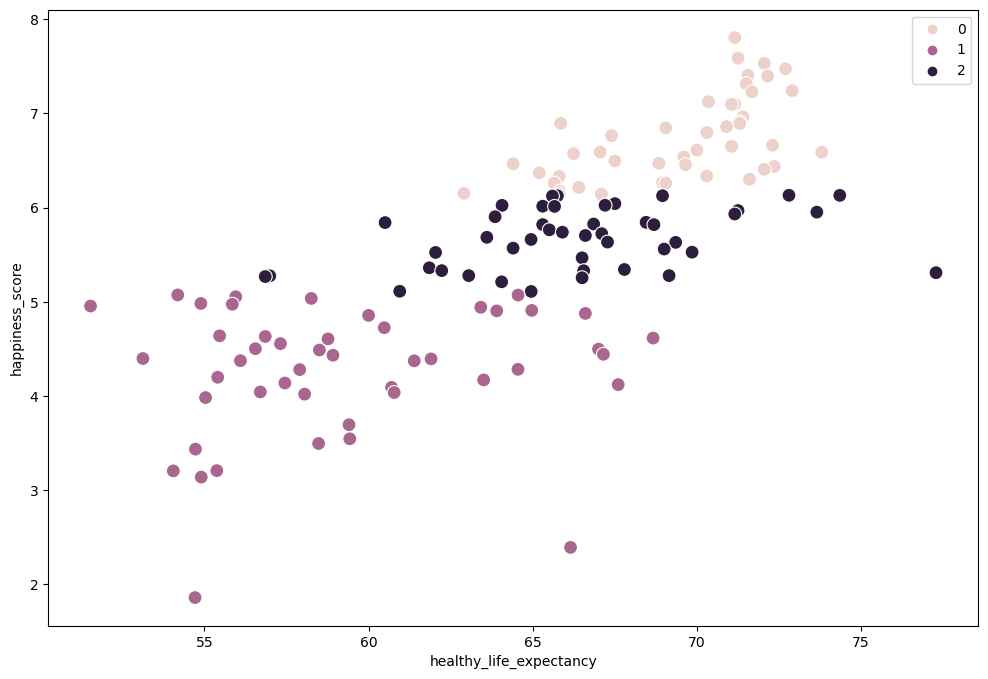

In [33]:
# Plot the clusters for the "healthy_life_expectancy" and "happiness_score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['healthy_life_expectancy'], y=df2['happiness_score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('healthy_life_expectancy') # Label x-axis.
plt.ylabel('happiness_score') # Label y-axis.
plt.show()

In [35]:
df2.loc[df2['clusters'] == 2, 'cluster'] = 'dark purple'
df2.loc[df2['clusters'] == 1, 'cluster'] = 'purple'
df2.loc[df2['clusters'] == 0, 'cluster'] = 'pink'

In [38]:
df2.groupby('cluster').agg({'gdp_per_capita':['mean', 'median'], 
                         'healthy_life_expectancy':['mean', 'median'], 
                         'social_support':['mean', 'median'],
                          'happiness_score':['mean', 'median']})

gdp_per_capita         healthy_life_expectancy          \
                      mean  median                    mean  median   
cluster                                                              
dark purple       9.489733   9.582               66.379933  66.500   
pink             10.575933  10.662               69.474667  70.300   
purple            8.333340   8.385               59.300184  58.475   

            social_support        happiness_score         
                      mean median            mean median  
cluster                                                   
dark purple       0.832444  0.836        5.672644  5.703  
pink              0.906244  0.915        6.734978  6.609  
purple            0.664511  0.663        4.268277  4.397

In [39]:
df2.groupby('cluster').agg({'gdp_per_capita':['mean', 'median'], 
                         'healthy_life_expectancy':['mean', 'median'],
                          'happiness_score':['mean', 'median']})

gdp_per_capita         healthy_life_expectancy          \
                      mean  median                    mean  median   
cluster                                                              
dark purple       9.489733   9.582               66.379933  66.500   
pink             10.575933  10.662               69.474667  70.300   
purple            8.333340   8.385               59.300184  58.475   

            happiness_score         
                       mean median  
cluster                             
dark purple        5.672644  5.703  
pink               6.734978  6.609  
purple             4.268277  4.397

## Comments

We can see through these clusters’ multiple insightful information; we can notice that people from a country with higher GDP are in a higher position compared with the Healthy life expectancy variable.
This tendency is also shown in the clusters between variables happiness score vs GDP.

The data is useful for future prediction at the moment of analysing countries when a country shows a higher GDP, we could infer that the happiness of its people is higher.
